In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import torchvision
import torchvision.transforms as transforms
import torch 
import torch.nn as nn

%matplotlib inline

In [2]:
img_path = r'.\data\img\AI-1_01.jpg'
img = cv2.imread(img_path)
img.shape

(6016, 4016, 3)

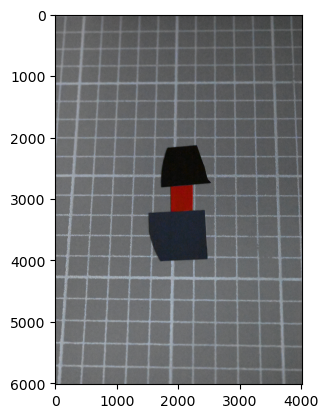

In [3]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'
temp_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(temp_img)

False

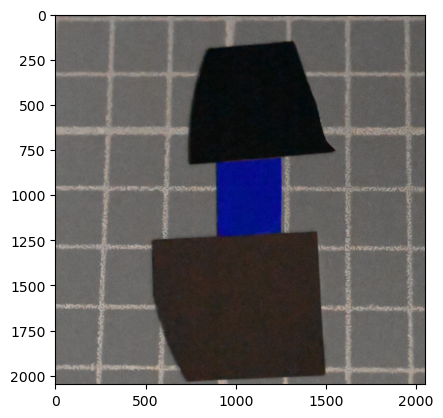

In [4]:
#transform image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.CenterCrop(2048),
    ])


image = transform(img)
image.shape
plt.imshow(image.permute(1, 2, 0))
cv2.imwrite(r'.\data\test_img\AI-1_01_transformed.jpg', image.permute(1, 2, 0).numpy()*255)

In [6]:
for i in range(1, 33):
    for j in range(1, 5):
        img_path = r'.\data\img\AI-{}_0{}.jpg'.format(i, j)
        if not os.path.exists(img_path):
            continue
        img = cv2.imread(img_path)
        image = transform(img)
        cv2.imwrite(r'.\data\test_img\AI-{}_0{}_transformed.jpg'.format(i, j), image.permute(1, 2, 0).numpy()*255)

In [7]:
img_path_list = []

for i in range(1, 33):
    for j in range(1, 5):
        if i == 9 and j == 1: 
            continue
        img_path_list.append('./data/test_img/AI-{}_0{}_transformed.jpg'.format(i, j))
        
img_path_list[:5]

['./data/test_img/AI-1_01_transformed.jpg',
 './data/test_img/AI-1_02_transformed.jpg',
 './data/test_img/AI-1_03_transformed.jpg',
 './data/test_img/AI-1_04_transformed.jpg',
 './data/test_img/AI-2_01_transformed.jpg']

(2048, 2048, 3)

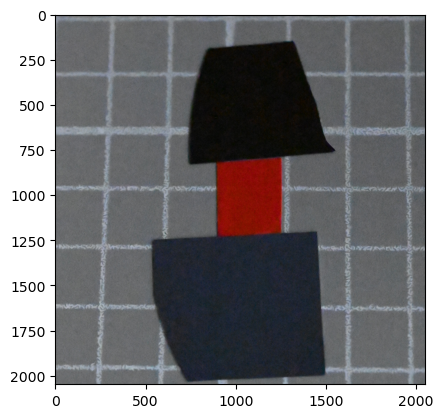

In [8]:
import matplotlib.pyplot as plt
from PIL import Image

img_path = img_path_list[0]  # Assuming img_path_list contains the path to your image
img = Image.open(img_path)

plt.imshow(img)
img = np.array(img)
img.shape

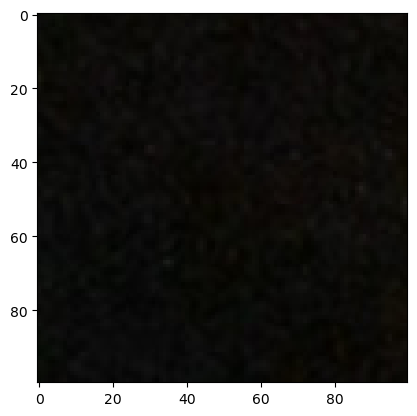

In [10]:
top_box = img[460:560, 1000:1100] 
plt.imshow(top_box)

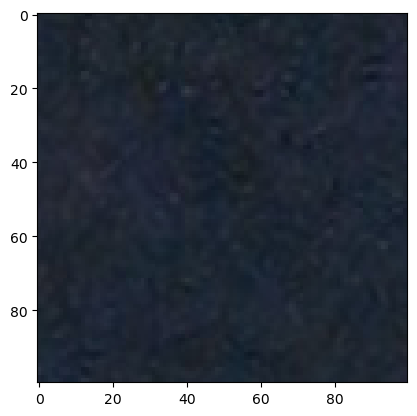

In [11]:
bottom_box = img[1400:1500, 1000:1100] 
plt.imshow( bottom_box)

In [12]:
Top_path = './data/box_img/Top/'
Bot_path = './data/box_img/Bot/'

for i in range(len(img_path_list)):
    img_path = img_path_list[i]
    img = Image.open(img_path)
    img = np.array(img)
    
    top_box = img[460:560, 1000:1100] 
    bottom_box = img[1400:1500, 1000:1100] 
    
    top_box = Image.fromarray(top_box)
    bottom_box = Image.fromarray(bottom_box)
    
    top_box.save(Top_path + 'Top_{}.jpg'.format(i))
    bottom_box.save(Bot_path + 'Bot_{}.jpg'.format(i))
    
    if i % 100 == 0:
        print(i)

0
100


In [13]:
top_avg_rgb = []
bot_avg_rgb = []
for i in range(len(img_path_list)):
    top = Image.open(Top_path + 'Top_{}.jpg'.format(i))
    bot = Image.open(Bot_path + 'Bot_{}.jpg'.format(i))
    top = np.array(top)
    bot = np.array(bot)
    Top_R, Top_G, Top_B = np.mean(top[:, :, 0]), np.mean(top[:, :, 1]), np.mean(top[:, :, 2])
    Bot_R, Bot_G, Bot_B = np.mean(bot[:, :, 0]), np.mean(bot[:, :, 1]), np.mean(bot[:, :, 2])
    
    top_avg_rgb.append([Top_R, Top_G, Top_B])
    bot_avg_rgb.append([Bot_R, Bot_G, Bot_B])

    
    

In [14]:
Thickness = pd.read_csv('./data/Thickness.csv')
Thickness = Thickness.drop([33]) # 9-1 drop
Thickness.reset_index(drop=True, inplace=True)
Thickness

,Thickness
0,48.266667
1,47.966667
2,48.166667
3,48.600000
4,59.533333
...,...
122,84.633333
123,98.366667
124,97.033333
125,96.266667


In [15]:
Table_dataset = pd.DataFrame({'Top_R': [i[0] for i in top_avg_rgb], 'Top_G': [i[1] for i in top_avg_rgb], 'Top_B': [i[2] for i in top_avg_rgb],
              'Bot_R' : [i[0] for i in bot_avg_rgb], 'Bot_G' : [i[1] for i in bot_avg_rgb], 'Bot_B' : [i[2] for i in bot_avg_rgb],
              'Thickness': Thickness['Thickness']})

Table_dataset

,Top_R,Top_G,Top_B,Bot_R,Bot_G,Bot_B,Thickness
0,11.6946,10.9098,8.1691,30.0046,37.9564,49.9154,48.266667
1,12.3677,12.7517,11.2189,25.7097,34.7937,43.0995,47.966667
2,12.6729,12.8985,9.9953,31.0536,35.7752,41.5669,48.166667
3,11.4028,11.4436,8.6145,24.9250,32.4114,39.4482,48.600000
4,5.5140,3.0513,1.7067,25.9343,32.6192,38.1195,59.533333
...,...,...,...,...,...,...,...
122,0.8366,4.9508,22.0309,27.0377,35.2007,42.7298,84.633333
123,1.1502,15.5998,34.0284,27.8789,35.6625,40.2166,98.366667
124,1.1882,13.6776,38.5057,27.8185,36.2219,43.5469,97.033333
125,1.1946,13.6719,35.4808,30.9634,36.4496,45.8083,96.266667


In [36]:
Table_dataset.to_csv('./data/Table_dataset.csv', index=False)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(Table_dataset.iloc[:, :-1], Table_dataset.iloc[:, -1], test_size=0.3, random_state=42)

In [21]:
from tpot import TPOTRegressor

tpot =  TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42, cv=5, n_jobs = -1)
tpot.fit(X_train, y_train)

tpot.export('tpot_pipeline_cv.py')

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: AdaBoostRegressor(LassoLarsCV(input_matrix, normalize=True), learning_rate=0.1, loss=linear, n_estimators=100)


In [24]:
y_pred = tpot.predict(X_test)
y_pred

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LassoLarsCV was fitted with feature names
  warnings.warn(


array([ 72.12173913,  62.20952381,  72.35789474,  97.5       ,
        95.10833334,  62.42333333,  72.22857143,  85.12698413,
        62.77878788, 111.12222222,  97.41666667,  61.69230769,
        83.57466667,  63.15925926,  83.46166667, 109.87499998,
        85.12698413,  83.70185185,  70.84197531,  83.96111111,
        71.77272727,  62.42333333,  83.75632184, 153.3       ,
        48.34      , 153.3       ,  98.3882353 ,  98.3882353 ,
        72.49393939,  83.70185185,  62.42333333,  65.93333333,
        72.16153846, 111.74285714,  95.45277778,  98.33939394,
        71.83      , 153.3       ,  77.19333333])

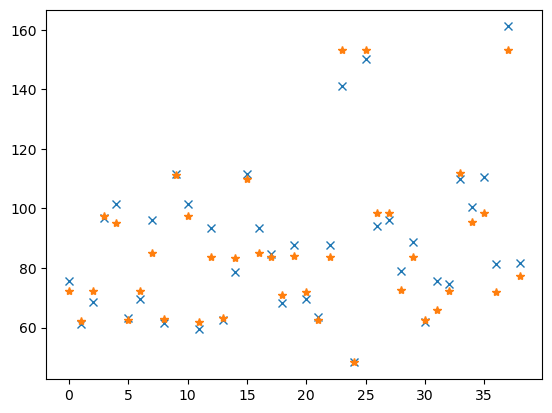

In [25]:
plt.plot(y_test.values,'x', label = 'True')
plt.plot(y_pred,'*', label = 'Predict')

In [26]:
pd.DataFrame({'True': y_test.values, 'Predict': y_pred})

,True,Predict
0,75.533333,72.121739
1,61.300000,62.209524
2,68.700000,72.357895
3,96.633333,97.500000
4,101.466667,95.108333
5,63.166667,62.423333
6,69.433333,72.228571
7,96.266667,85.126984
8,61.466667,62.778788
9,111.533333,111.122222


In [27]:
mse = np.mean((y_test.values - y_pred)**2)
mse

29.942509053533723

### Refernence 없이 진행

In [28]:
Table_dataset_only_top = Table_dataset.drop(['Bot_R', 'Bot_G', 'Bot_B'], axis = 1)
Table_dataset_only_top

,Top_R,Top_G,Top_B,Thickness
0,11.6946,10.9098,8.1691,48.266667
1,12.3677,12.7517,11.2189,47.966667
2,12.6729,12.8985,9.9953,48.166667
3,11.4028,11.4436,8.6145,48.600000
4,5.5140,3.0513,1.7067,59.533333
...,...,...,...,...
122,0.8366,4.9508,22.0309,84.633333
123,1.1502,15.5998,34.0284,98.366667
124,1.1882,13.6776,38.5057,97.033333
125,1.1946,13.6719,35.4808,96.266667


In [29]:
X_train, X_test, y_train, y_test = train_test_split(Table_dataset_only_top.iloc[:, :-1], Table_dataset_only_top.iloc[:, -1], test_size=0.3, random_state=42)

In [30]:
from tpot import TPOTRegressor

tpot =  TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42, cv=5, n_jobs = -1)
tpot.fit(X_train, y_train)

tpot.export('tpot_pipeline_cv2.py')

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: AdaBoostRegressor(input_matrix, learning_rate=1.0, loss=exponential, n_estimators=100)


In [31]:
y_pred = tpot.predict(X_test)
y_pred

array([ 71.84444444,  62.53333333,  72.125     ,  98.72      ,
        87.73333333,  63.525     ,  72.18125   ,  91.07083333,
        65.04888889, 105.57666668,  98.72      ,  62.08888889,
        84.07259259,  62.34871795,  81.896     , 102.46333333,
        84.07259259,  82.37272727,  66.84666667,  84.07259259,
        68.47      ,  63.525     ,  84.01904762, 153.3       ,
        48.6       , 124.4333333 , 100.81515152, 100.81515152,
        72.18125   ,  84.07259259,  63.5       ,  72.52380952,
        72.21666667, 104.52857143,  91.94242424, 101.7       ,
        71.83      , 122.97777777,  75.03333333])

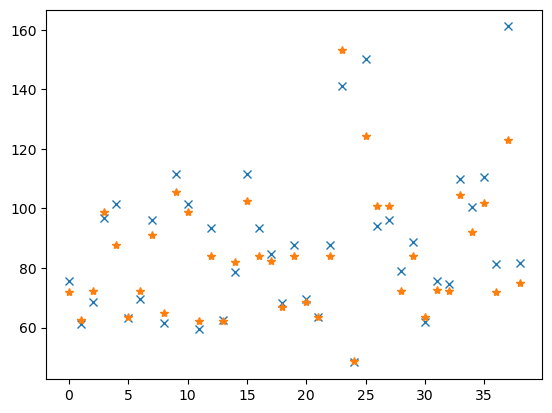

In [32]:
plt.plot(y_test.values,'x', label = 'True')
plt.plot(y_pred,'*', label = 'Predict')

In [33]:
pd.DataFrame({'True': y_test.values, 'Predict': y_pred})

,True,Predict
0,75.533333,71.844444
1,61.300000,62.533333
2,68.700000,72.125000
3,96.633333,98.720000
4,101.466667,87.733333
5,63.166667,63.525000
6,69.433333,72.181250
7,96.266667,91.070833
8,61.466667,65.048889
9,111.533333,105.576667


In [34]:
mse = np.mean((y_pred - y_test)**2)
mse

86.02070478967943